# Problemática: 
la incógnita de sí el laboratorio de suelos de la Universidad de la Guajira maneja la temperatura y la humedad ideal para la preservación de las muestras.
# Métrica: 
Los datos registrados por los sensores en los últimos 6 meses del laboratorio de la Universidad.
# PREGUNTA SMART:
¿Han mantenido los registros de temperatura del laboratorio durante los últimos 6 meses los valores ideales  (25°C y 50% de Humedad), necesarios para la preservación de muestras de suelo?
# La ciencia de datos serviría para resolver esta problemática porque:
El análisis de las sondeos hechos por los sensores del laboratorio permitirían llegar a una conclusión estudiada de la obtención de las certificaciones para los laboratorios. 

In [1]:
#Lo primero que se debe hacer es importar la libreria pandas para poder leer el archivo excel
import pandas as pd
from tabulate import tabulate

#Se debe especificar la ruta del archivo excel, en este caso se encuentra en la carpeta del proyecto
file_path = 'C:\\Users\\accc_\\ICESI\\Analisis exploratorio\\Tareas-Analisis-Exploratorio\\Tareas-Analisis-Exploratorio\\Taller 3\\Datos laboratorio Fisica de Suelos.xlsx'
#Se crea el dataframe con la funcion read_excel, se especifica el nombre de la hoja que se quiere leer
df=pd.read_excel(file_path, sheet_name='Lista')
#Se imprime el dataframe para verificar que se haya cargado correctamente y sin valores nulos
print(df.isnull().sum())

# 1. Asegurarse de que la columna 'Tiempo' esté en formato datetime
df['Tiempo'] = pd.to_datetime(df['Tiempo'])
df['Fecha'] = df['Tiempo'].dt.date

# 2. Extraer solo la hora (en formato HH:MM:SS)
df['Hora'] = df['Tiempo'].dt.time

# 3. Reorder the columns
df = df[['No.', 'Hora', 'Fecha', 'Temperatura°C', 'Humedad%']]

# 4. Print the updated dataframe
print(tabulate(df.head(5), headers='keys', tablefmt='pretty', showindex=False))

print(tabulate(df.tail(5), headers='keys', tablefmt='pretty', showindex=False))



No.              0
Tiempo           0
Temperatura°C    0
Humedad%         0
dtype: int64
+-----+----------+------------+---------------+----------+
| No. |   Hora   |   Fecha    | Temperatura°C | Humedad% |
+-----+----------+------------+---------------+----------+
|  1  | 09:50:41 | 2024-03-22 |     27,5      |   49,6   |
|  2  | 10:50:41 | 2024-03-22 |     24,1      |   52,2   |
|  3  | 11:50:41 | 2024-03-22 |     24,7      |   51,8   |
|  4  | 12:50:41 | 2024-03-22 |     24,9      |   49,8   |
|  5  | 13:50:41 | 2024-03-22 |     24,8      |   48,3   |
+-----+----------+------------+---------------+----------+
+------+----------+------------+---------------+----------+
| No.  |   Hora   |   Fecha    | Temperatura°C | Humedad% |
+------+----------+------------+---------------+----------+
| 3334 | 06:50:41 | 2024-08-08 |     28,5      |   70,8   |
| 3335 | 07:50:41 | 2024-08-08 |     28,7      |   72,8   |
| 3336 | 08:50:41 | 2024-08-08 |     23,7      |   61,2   |
| 3337 | 09:50:41 | 

# Analisis univariado:

Para el análisis univariado del dataset se utilizó la columna de temperatura con el objetivo de estudiar sus variaciones y obtener una conclusión preliminar sobre su proximidad al valor ideal (25 grados Celsius). El estudio comenzó graficando los resultados de las horas de la mañana (antes de las 12 PM) y calculando el promedio de la temperatura durante este periodo para compararlo con las horas de la tarde. El propósito fue determinar si el laboratorio lograba alcanzar los valores idóneos, considerando el margen de error de los sensores (± 0,5 grados).

No.              0
Tiempo           0
Temperatura°C    0
Humedad%         0
dtype: int64
Average Temperature: 27.431317365269464
Porcentaje de datos entre 24.5°C y 25.5°C: 6.71%


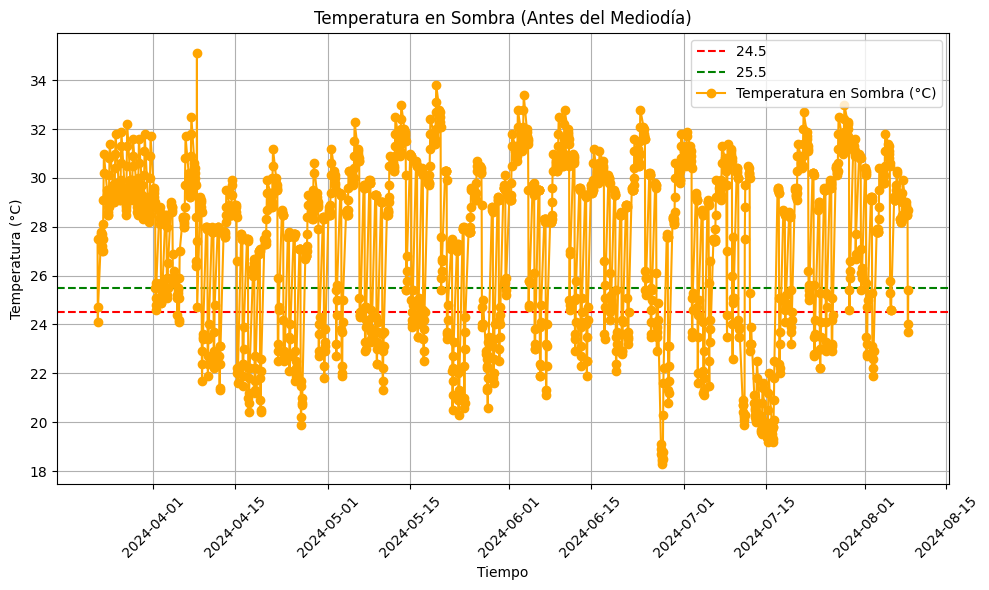

In [2]:
# Lo primero que se debe hacer es importar las librerías necesarias

import matplotlib.pyplot as plt

# Cargar archivo Excel y leer los datos
file_path = 'C:\\Users\\accc_\\ICESI\\Analisis exploratorio\\Tareas-Analisis-Exploratorio\\Tareas-Analisis-Exploratorio\\Taller 3\\Datos laboratorio Fisica de Suelos.xlsx'
df = pd.read_excel(file_path, sheet_name='Lista')

# Verificar si hay valores nulos
print(df.isnull().sum())

# 1. Asegurarse de que la columna 'Tiempo' esté en formato datetime
df['Tiempo'] = pd.to_datetime(df['Tiempo'])
df['Fecha'] = df['Tiempo'].dt.date

# 2. Convertir la columna 'Temperatura°C' de texto a numérico (reemplazar comas por puntos)
df['Temperatura°C'] = df['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)

# 3. Filtrar las horas antes del mediodía (12:00 PM) directamente usando la columna 'Tiempo'
df_morning = df[df['Tiempo'].dt.hour < 12]
# Calculate the average value of the 'Temperatura°C' column
average_temperature = df_morning['Temperatura°C'].mean()

# Print the average value
print("Average Temperature:", average_temperature)

#Filtrar los datos que están entre 24.5°C y 25.5°C
df_in_range = df_morning[(df_morning['Temperatura°C'] >= 24.5) & (df_morning['Temperatura°C'] <= 25.5)]

# Calcular el porcentaje de datos que están entre 24.5 y 25.5
percentage_in_range = (len(df_in_range) / len(df_morning)) * 100

# Imprimir el porcentaje
print(f"Porcentaje de datos entre 24.5°C y 25.5°C: {percentage_in_range:.2f}%")

# 4. Reorganizar las columnas
df_morning = df_morning[['No.', 'Tiempo', 'Temperatura°C', 'Humedad%']]

# 5. Graficar solo los datos de temperatura en función de la hora antes del mediodía

# Configurar la gráfica
plt.figure(figsize=(10, 6))

# Añadir líneas horizontales en 24.5 y 25.5
plt.axhline(y=24.5, color='red', linestyle='--', label='24.5')
plt.axhline(y=25.5, color='green', linestyle='--', label='25.5')

# Graficar la temperatura
plt.plot(df_morning['Tiempo'], df_morning['Temperatura°C'], label='Temperatura en Sombra (°C)', color='orange', marker='o')

# Etiquetas y título del gráfico
plt.xlabel('Tiempo')  # Etiqueta del eje X
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura en Sombra (Antes del Mediodía)')

# Reducir la cantidad de etiquetas en el eje X
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))  # Limitar la cantidad de etiquetas en el eje Y
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


Posterior a haber hecho la graficación de la temperatura con los datos anteriores al medio día se saca que el porcentaje por el cual la cantidad de muestras coincide con el rango ideal, resultando tanto el promedio (27.43 grados) como el porcentaje de muestras dentro del rango (6.71%) inferiores a lo que se busca en el proyecto. Por lo menos a horas de la mañana.

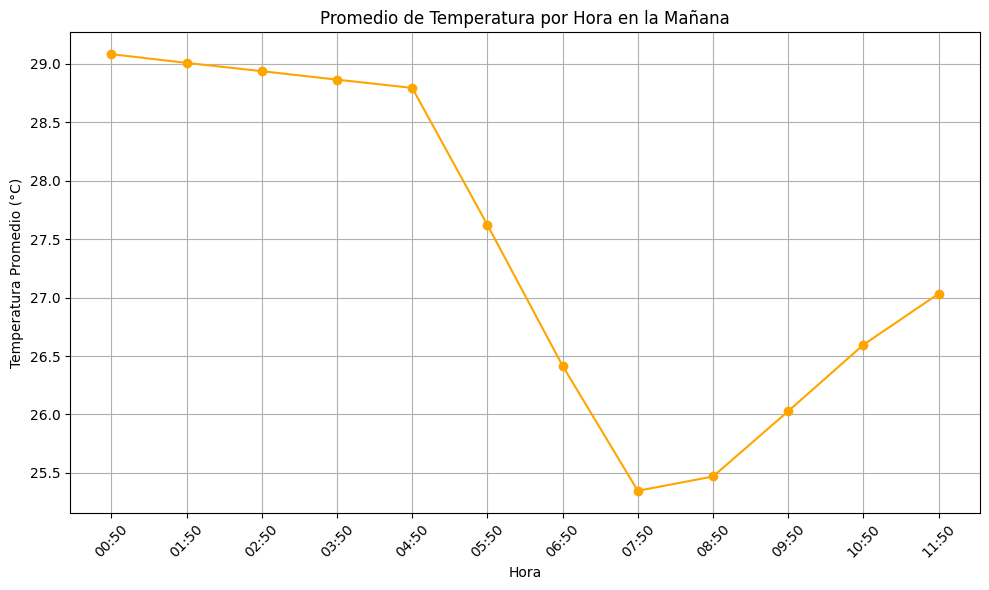

In [3]:


# Asegurarnos de que el formato de la columna 'Tiempo' sea datetime
df_morning['Tiempo'] = pd.to_datetime(df_morning['Tiempo'])

# Convertir la columna 'Temperatura°C' a formato numérico (reemplazar comas por puntos si es necesario)
df_morning['Temperatura°C'] = df_morning['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)

# Crear una nueva columna con solo las horas (sin minutos ni segundos)
df_morning['Hora'] = df_morning['Tiempo'].dt.strftime('%H:%M')

# Agrupar los datos por 'Hora' y calcular el promedio de la temperatura
df_morning_grouped = df_morning.groupby('Hora')['Temperatura°C'].mean().reset_index()

# Graficar los promedios de temperatura por hora
plt.figure(figsize=(10, 6))

# Graficar la temperatura promedio por hora
plt.plot(df_morning_grouped['Hora'], df_morning_grouped['Temperatura°C'], label='Temperatura Promedio (°C)', color='orange', marker='o')

# Configuraciones de la gráfica
plt.xlabel('Hora')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Promedio de Temperatura por Hora en la Mañana')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Para concluir el estudio de la mañana se sacó el promedio de temperatura en las horas de la mañana, esto con el fin de bosquejar la variación de temperatura de una manera más próxima a cómo fue el análisis inicial. Como se puede observar, la temperatura a horas anteriores de la madrugada es más alta que las horas cercanas a las 12, pero va descendiendo hasta llegar a cerca de las 8 AM donde inicia un ascenso menos pronunciado al mediodía. A este punto no podemos explicar este fenómeno, por lo que se pasará a analizar las horas de la tarde.

Porcentaje de datos entre 24.5°C y 25.5°C: 10.31%
Average Temperature: 28.24418465227818


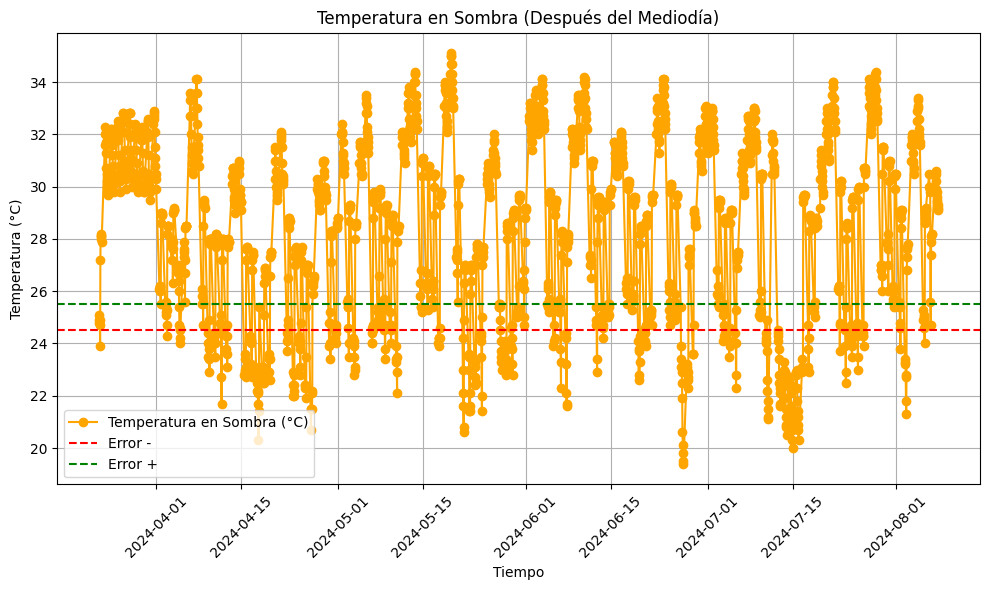

In [4]:


# 2. Convertir la columna 'Temperatura°C' de texto a numérico (reemplazar comas por puntos)
df['Temperatura°C'] = df['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)

# 3. Filtrar las horas después del mediodía (12:00 PM) usando la columna 'Tiempo'
df_afternoon = df[df['Tiempo'].dt.hour >= 12]

# Filtrar los datos que están entre 24.5°C y 25.5°C
df_in_range = df_afternoon[(df_afternoon['Temperatura°C'] >= 24.5) & (df_afternoon['Temperatura°C'] <= 25.5)]

# Calcular el porcentaje de datos que están entre 24.5 y 25.5
percentage_in_range = (len(df_in_range) / len(df_afternoon)) * 100

# Imprimir el porcentaje
print(f"Porcentaje de datos entre 24.5°C y 25.5°C: {percentage_in_range:.2f}%")

# Calculate the average value of the 'Temperatura°C' column
average_temperature = df_afternoon['Temperatura°C'].mean()

# Print the average value
print("Average Temperature:", average_temperature)

# 4. Reorganizar las columnas
df_afternoon = df_afternoon[['No.', 'Tiempo', 'Temperatura°C', 'Humedad%']]

# 5. Graficar solo los datos de temperatura en función de la hora después del mediodía

# Configurar la gráfica
plt.figure(figsize=(10, 6))

# Graficar la temperatura
plt.plot(df_afternoon['Tiempo'], df_afternoon['Temperatura°C'], label='Temperatura en Sombra (°C)', color='orange', marker='o')

# Añadir líneas horizontales en 24.5 y 25.5
plt.axhline(y=24.5, color='red', linestyle='--', label='Error -')
plt.axhline(y=25.5, color='green', linestyle='--', label='Error +')

# Etiquetas y título del gráfico
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura en Sombra (Después del Mediodía)')

# Reducir la cantidad de etiquetas en el eje X
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))  # Limitar la cantidad de etiquetas en el eje Y
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


Durante las horas de la tarde, el promedio total de temperatura fue ligeramente superior al de la mañana (28,24°C frente a 27,43°C). Sin embargo, las lecturas de los sensores registraron un porcentaje significativamente más cercano al rango ideal, alcanzando un 10,31%. Esto podría deberse a que la cantidad de muestras es mayor en las horas de la tarde, lo que aumenta la probabilidad de que la proporción de datos dentro del rango ideal sea más frecuente.

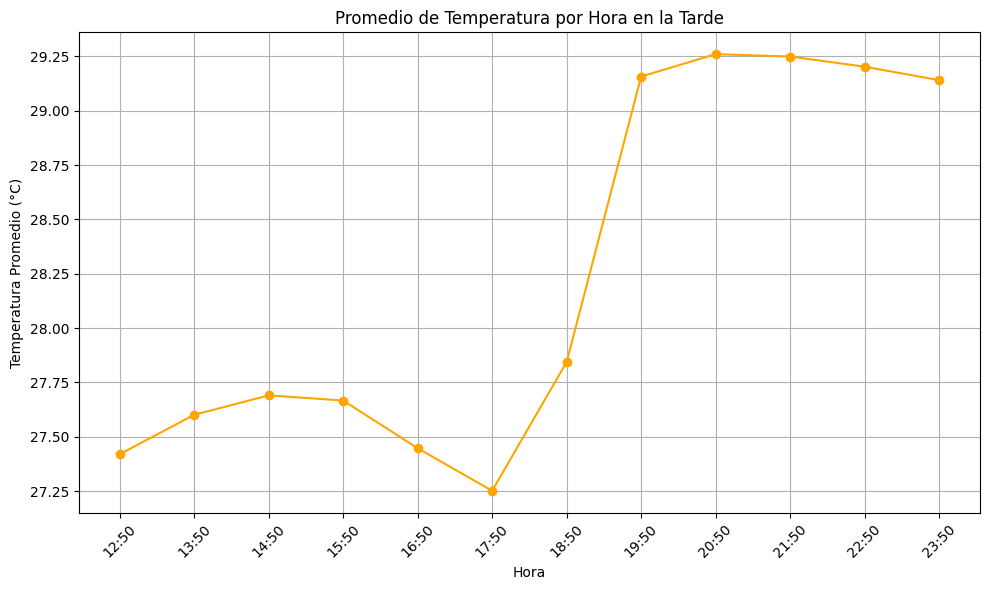

In [5]:

# Asegurarnos de que el formato de la columna 'Tiempo' sea datetime
df_afternoon['Tiempo'] = pd.to_datetime(df_afternoon['Tiempo'])

# Convertir la columna 'Temperatura°C' a formato numérico (reemplazar comas por puntos si es necesario)
df_afternoon['Temperatura°C'] = df_afternoon['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)

# Crear una nueva columna con solo las horas (sin minutos ni segundos)
df_afternoon['Hora'] = df_afternoon['Tiempo'].dt.strftime('%H:%M')

# Agrupar los datos por 'Hora' y calcular el promedio de la temperatura
df_afternoon_grouped = df_afternoon.groupby('Hora')['Temperatura°C'].mean().reset_index()

# Graficar los promedios de temperatura por hora en la tarde
plt.figure(figsize=(10, 6))

# Graficar la temperatura promedio por hora en la tarde
plt.plot(df_afternoon_grouped['Hora'], df_afternoon_grouped['Temperatura°C'], label='Temperatura Promedio (°C)', color='orange', marker='o')

# Configuraciones de la gráfica
plt.xlabel('Hora')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Promedio de Temperatura por Hora en la Tarde')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


La graficación del promedio de los valores por hora demuestra que la temperatura fue más elevada en las horas de la tarde en comparación con las horas de la mañana. Además, complementa el gráfico de los promedios matutinos, ya que muestra que el crecimiento de la temperatura no fue tan pronunciado hasta cerca de las 6 PM, momento en el cual la curva se vuelve más abrupta. Cabe destacar que el rango ideal no se reflejó en los promedios por hora.

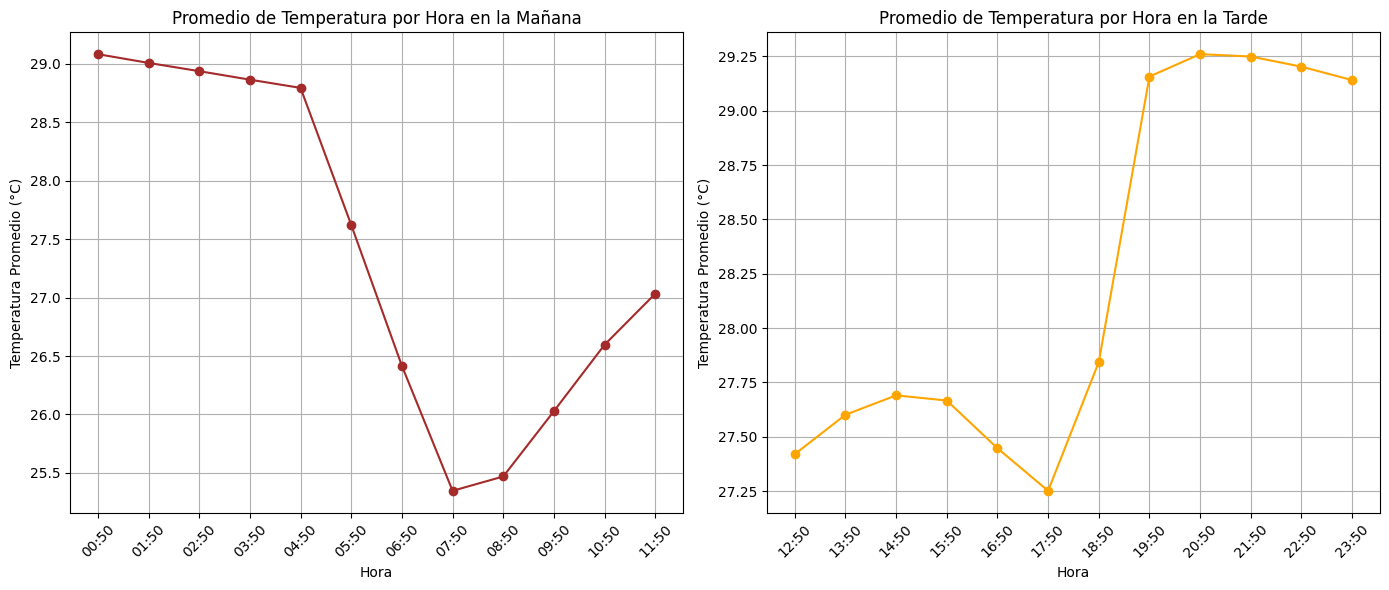

In [6]:





# Crear subplots: 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Promedio de temperatura por hora en la mañana
ax1.plot(df_morning_grouped['Hora'], df_morning_grouped['Temperatura°C'], label='Temperatura Mañana (°C)', color='brown', marker='o')
ax1.set_xlabel('Hora')
ax1.set_ylabel('Temperatura Promedio (°C)')
ax1.set_title('Promedio de Temperatura por Hora en la Mañana')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Gráfico 2: Promedio de temperatura por hora en la tarde
ax2.plot(df_afternoon_grouped['Hora'], df_afternoon_grouped['Temperatura°C'], label='Temperatura Tarde (°C)', color='orange', marker='o')
ax2.set_xlabel('Hora')
ax2.set_ylabel('Temperatura Promedio (°C)')
ax2.set_title('Promedio de Temperatura por Hora en la Tarde')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar ambos gráficos
plt.show()


El análisis de los promedios de la columna de temperatura indica una variación que sigue un patrón similar a una campana de Gauss, donde los valores más altos se alcanzan en horas de la noche y los más bajos se registran cerca de las 8 AM y las 6 PM. En principio, se esperaría que las horas del día tuvieran las temperaturas más altas debido a la exposición directa a la luz solar. Sin embargo, el hecho de que los promedios reflejen la dispersión de las muestras y demuestren una continuidad parece indicar que las horas de la noche son más calurosas en el laboratorio que las del día. Además, solo en una ventana de tiempo específica (en medio de 8 AM y las 9 AM) los promedios se encontraron dentro del rango ideal.

# Análisis Bivariado o Multivariado

Porcentaje de datos entre 47% y 53% de humedad: 4.61%
Average Humidity: 62.93994011976048


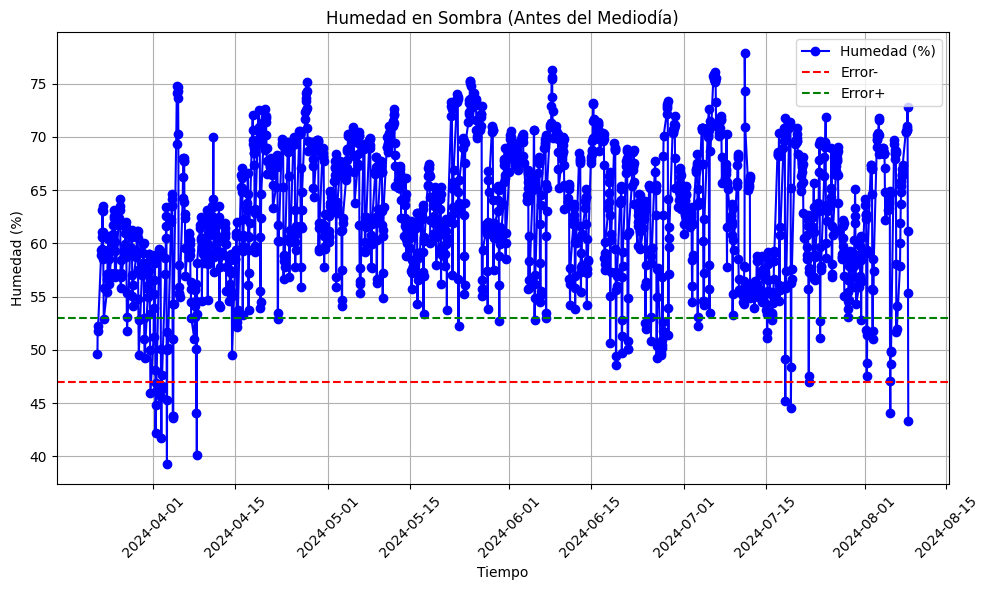

In [7]:

# 2. Convertir la columna 'Humedad%' de texto a numérico (reemplazar comas por puntos)
df['Humedad%'] = df['Humedad%'].astype(str).str.replace(',', '.').astype(float)

# 3. Filtrar las horas antes del mediodía (12:00 PM) directamente usando la columna 'Tiempo'
df_morning = df[df['Tiempo'].dt.hour < 12]

# 4. Reorganizar las columnas
df_morning = df_morning[['No.', 'Tiempo', 'Temperatura°C', 'Humedad%']]

# Filtrar los datos que están entre 47% y 53%
df_in_range = df_morning[(df_morning['Humedad%'] >= 47) & (df_morning['Humedad%'] <= 53)]

# Calcular el porcentaje de datos que están entre 47% y 53%
percentage_in_range = (len(df_in_range) / len(df_morning)) * 100

# Imprimir el porcentaje
print(f"Porcentaje de datos entre 47% y 53% de humedad: {percentage_in_range:.2f}%")
# Configurar la gráfica
plt.figure(figsize=(10, 6))

# Graficar la humedad
plt.plot(df_morning['Tiempo'], df_morning['Humedad%'], label='Humedad (%)', color='blue', marker='o')

# Añadir líneas horizontales en 47 y 53
plt.axhline(y=47, color='red', linestyle='--', label='Error-')
plt.axhline(y=53, color='green', linestyle='--', label='Error+')
# Calculate the average value of the 'Humedad%' column
average_humidity = df_morning['Humedad%'].mean()

# Print the average value
print("Average Humidity:", average_humidity)

# Etiquetas y título del gráfico
plt.xlabel('Tiempo')  # Etiqueta del eje X
plt.ylabel('Humedad (%)')
plt.title('Humedad en Sombra (Antes del Mediodía)')

# Reducir la cantidad de etiquetas en el eje X
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))  # Limitar la cantidad de etiquetas en el eje Y
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


Para el analisis bivariado tomé como referencia la columna de porcentaje de humedad y los separé de manera similar a los de temperatura (horas de la mañana y horas de la tarde), partí con la premisa que podría haber una correlación entre ambas variables dado a que por leyes metereológicas a mayor es la temperatura mayor es la humedad y viceversa, por lo que esperaba ver resultados similares entre ambas gráficas.

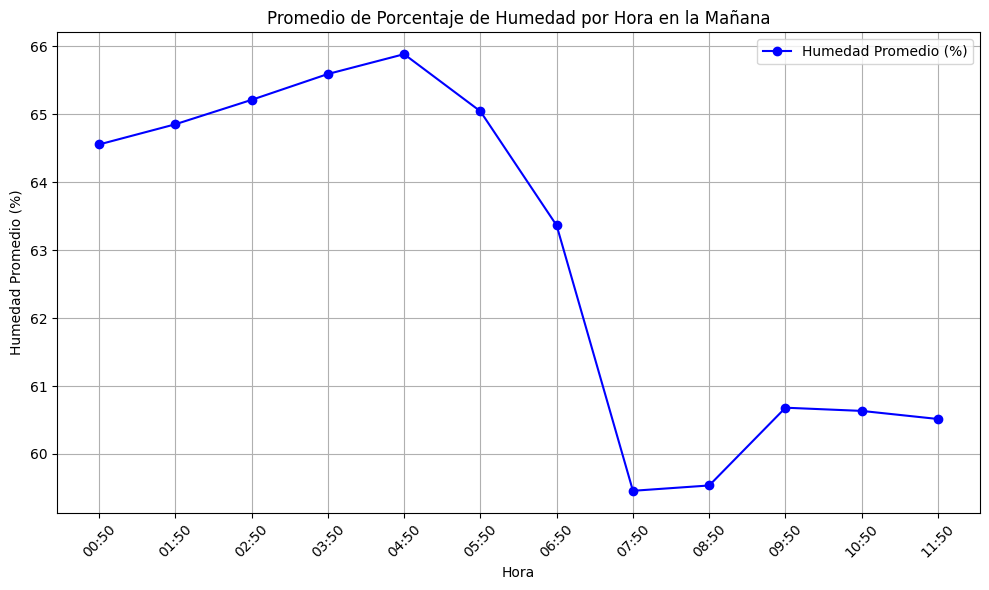

In [8]:

# Asegurarse de que la columna 'Tiempo' esté en formato datetime
df_morning['Tiempo'] = pd.to_datetime(df_morning['Tiempo'])

# Extraer la hora completa (sin minutos) para agrupar por hora
df_morning['Hora'] = df_morning['Tiempo'].dt.hour

# Agrupar por hora y calcular el promedio de humedad
df_grouped = df_morning.groupby('Hora')['Humedad%'].mean().reset_index()

# Crear una nueva columna con solo las horas (sin minutos ni segundos)
df_morning['Hora'] = df_morning['Tiempo'].dt.strftime('%H:%M')

# Agrupar los datos por 'Hora' y calcular el promedio de la temperatura
df_morning_grouped = df_morning.groupby('Hora')['Humedad%'].mean().reset_index()

# Graficar los promedios de temperatura por hora
plt.figure(figsize=(10, 6))


# Graficar el promedio de humedad por cada hora

plt.plot(df_morning_grouped['Hora'], df_morning_grouped['Humedad%'], label='Humedad Promedio (%)', color='blue', marker='o')

# Etiquetas y título del gráfico
plt.xlabel('Hora del Día (Mañana)')
plt.ylabel('Humedad Promedio (%)')
plt.title('Promedio de Humedad por Hora en la Mañana')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.xlabel('Hora')
plt.ylabel('Humedad Promedio (%)')
plt.title('Promedio de Porcentaje de Humedad por Hora en la Mañana')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.grid(True)
plt.tight_layout()


Porcentaje de datos entre 47% y 53% de humedad: 8.09%
Average Humidity: 61.18681055155876


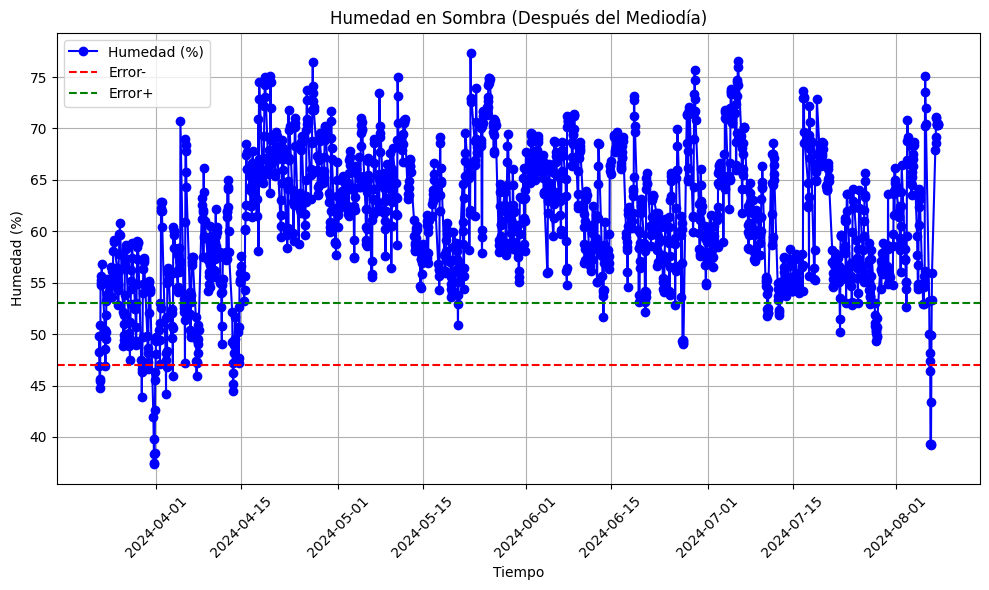

In [9]:


# 1. Asegurarse de que la columna 'Tiempo' esté en formato datetime
df['Tiempo'] = pd.to_datetime(df['Tiempo'])
df['Fecha'] = df['Tiempo'].dt.date

# 2. Convertir la columna 'Humedad%' de texto a numérico (reemplazar comas por puntos)
df['Humedad%'] = df['Humedad%'].astype(str).str.replace(',', '.').astype(float)

# 3. Filtrar las horas después del mediodía (12:00 PM) usando la columna 'Tiempo'
df_afternoon = df[df['Tiempo'].dt.hour >= 12]

# Filtrar los datos que están entre 47% y 53%
df_in_range = df_afternoon[(df_afternoon['Humedad%'] >= 47) & (df_afternoon['Humedad%'] <= 53)]

# Calcular el porcentaje de datos que están entre 47% y 53%
percentage_in_range = (len(df_in_range) / len(df_afternoon)) * 100

# Imprimir el porcentaje
print(f"Porcentaje de datos entre 47% y 53% de humedad: {percentage_in_range:.2f}%")

# Calculate the average value of the 'Humedad%' column
average_humidity = df_afternoon['Humedad%'].mean()

# Print the average value
print("Average Humidity:", average_humidity)
# 4. Reorganizar las columnas
df_afternoon = df_afternoon[['No.', 'Tiempo', 'Temperatura°C', 'Humedad%']]

# 5. Graficar solo los datos de humedad en función de la hora después del mediodía

# Configurar la gráfica
plt.figure(figsize=(10, 6))

# Graficar la humedad
plt.plot(df_afternoon['Tiempo'], df_afternoon['Humedad%'], label='Humedad (%)', color='blue', marker='o')

# Añadir líneas horizontales en 47 y 53
plt.axhline(y=47, color='red', linestyle='--', label='Error-')
plt.axhline(y=53, color='green', linestyle='--', label='Error+')

# Etiquetas y título del gráfico
plt.xlabel('Tiempo')
plt.ylabel('Humedad (%)')
plt.title('Humedad en Sombra (Después del Mediodía)')

# Reducir la cantidad de etiquetas en el eje X
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))  # Limitar la cantidad de etiquetas en el eje Y
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()


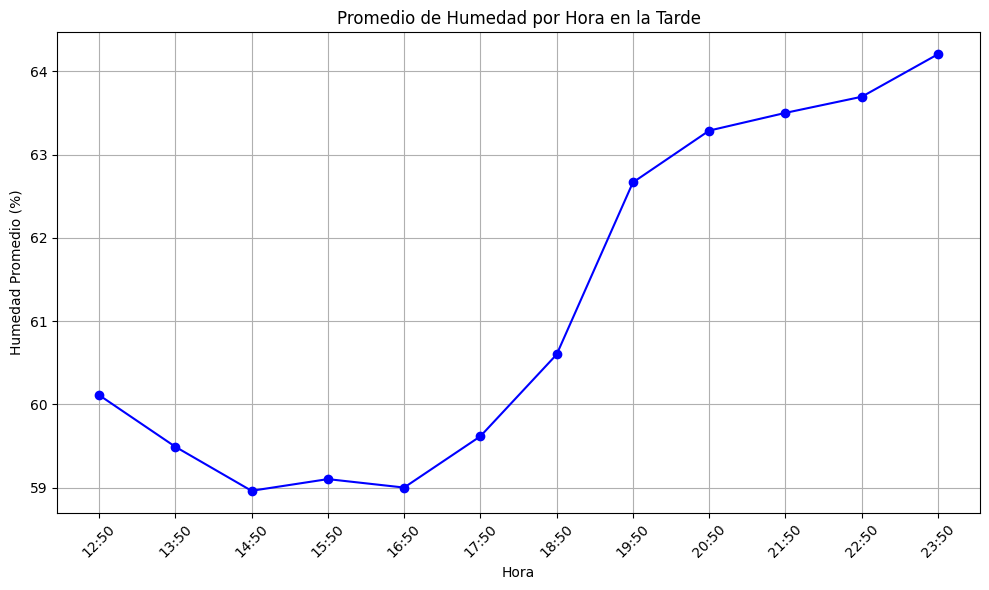

In [10]:
# Asegurarnos de que el formato de la columna 'Tiempo' sea datetime
df_afternoon['Tiempo'] = pd.to_datetime(df_afternoon['Tiempo'])



# Crear una nueva columna con solo las horas (sin minutos ni segundos)
df_afternoon['Hora'] = df_afternoon['Tiempo'].dt.strftime('%H:%M')

# Agrupar los datos por 'Hora' y calcular el promedio de la humedad
df_afternoon_grouped = df_afternoon.groupby('Hora')['Humedad%'].mean().reset_index()

# Graficar los promedios de temperatura por hora en la tarde
plt.figure(figsize=(10, 6))

# Graficar la temperatura promedio por hora en la tarde
plt.plot(df_afternoon_grouped['Hora'], df_afternoon_grouped['Humedad%'], label='Humedad (%)', color='blue', marker='o')

# Configuraciones de la gráfica
plt.xlabel('Hora')
plt.ylabel('Humedad Promedio (%)')
plt.title('Promedio de Humedad por Hora en la Tarde')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.grid(True)
plt.tight_layout()


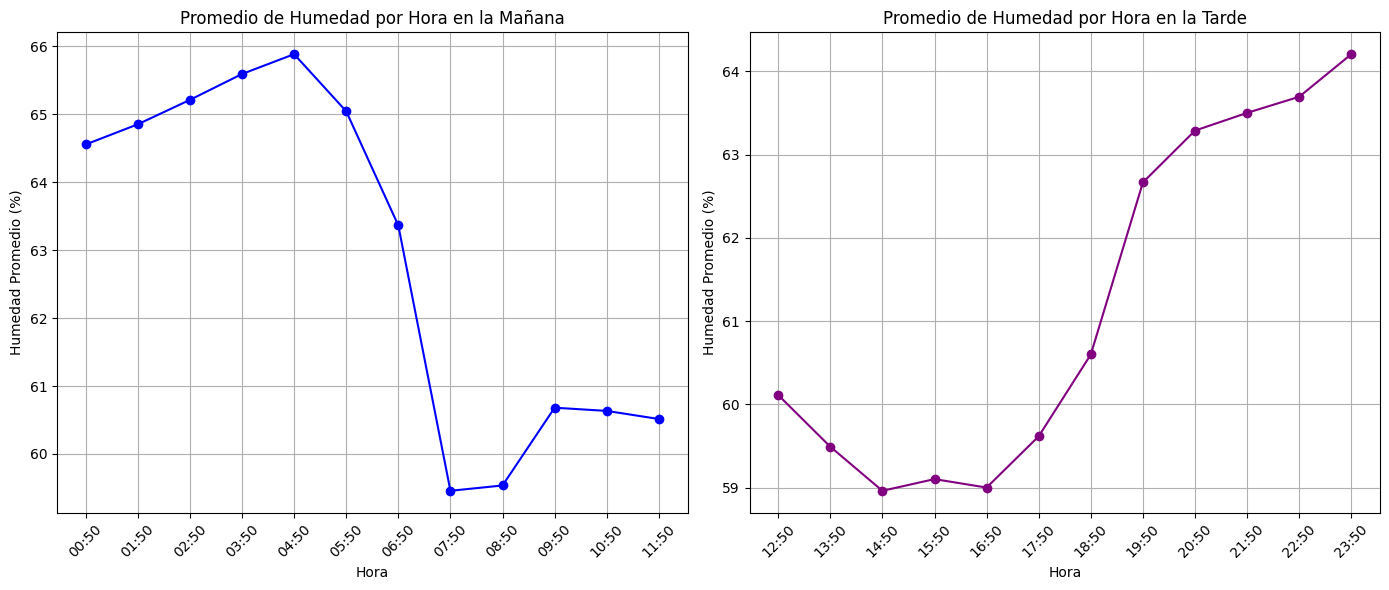

In [11]:

# Asegurarnos de que el formato de la columna 'Tiempo' sea datetime
df_morning['Tiempo'] = pd.to_datetime(df_morning['Tiempo'])
df_afternoon['Tiempo'] = pd.to_datetime(df_afternoon['Tiempo'])

# Crear una nueva columna con solo las horas (sin minutos ni segundos)
df_morning['Hora'] = df_morning['Tiempo'].dt.strftime('%H:%M')
df_afternoon['Hora'] = df_afternoon['Tiempo'].dt.strftime('%H:%M')

# Agrupar los datos por 'Hora' y calcular el promedio de la humedad
df_morning_grouped = df_morning.groupby('Hora')['Humedad%'].mean().reset_index()
df_afternoon_grouped = df_afternoon.groupby('Hora')['Humedad%'].mean().reset_index()

# Crear subplots: 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Promedio de humedad por hora en la mañana
ax1.plot(df_morning_grouped['Hora'], df_morning_grouped['Humedad%'], label='Humedad Mañana (%)', color='blue', marker='o')
ax1.set_xlabel('Hora')
ax1.set_ylabel('Humedad Promedio (%)')
ax1.set_title('Promedio de Humedad por Hora en la Mañana')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Gráfico 2: Promedio de humedad por hora en la tarde
ax2.plot(df_afternoon_grouped['Hora'], df_afternoon_grouped['Humedad%'], label='Humedad Tarde (%)', color='purple', marker='o')
ax2.set_xlabel('Hora')
ax2.set_ylabel('Humedad Promedio (%)')
ax2.set_title('Promedio de Humedad por Hora en la Tarde')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar ambos gráficos
plt.show()


Ya habiendo hecho las graficas y notar las similitudes se decidió ver el coeficiente de correlación entre los resultados de la mañana y los resultados de la tarde, esto con el fin de comprobar si lo que se veía en las gráficas tambien se correspondía con la información tomada.

In [12]:
# Asegurarnos de que el formato de la columna 'Tiempo' sea datetime
df_morning['Tiempo'] = pd.to_datetime(df_morning['Tiempo'])

# Convertir las columnas 'Temperatura°C' y 'Humedad%' a formato numérico (reemplazar comas por puntos si es necesario)
df_morning['Temperatura°C'] = df_morning['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)
df_morning['Humedad%'] = df_morning['Humedad%'].astype(str).str.replace(',', '.').astype(float)

# Crear una nueva columna con solo las horas (sin minutos ni segundos)
df_morning['Hora'] = df_morning['Tiempo'].dt.strftime('%H:%M')

# Agrupar los datos por 'Hora' y calcular el promedio de temperatura y humedad
df_morning_grouped = df_morning.groupby('Hora')[['Temperatura°C', 'Humedad%']].mean().reset_index()

# Calcular el coeficiente de correlación de Pearson entre la temperatura y la humedad
correlacion_morning = df_morning_grouped[['Temperatura°C', 'Humedad%']].corr()

# Mostrar la correlación
print("Coeficiente de correlación entre Temperatura y Humedad (mañana):")
print(correlacion_morning)


Coeficiente de correlación entre Temperatura y Humedad (mañana):
               Temperatura°C  Humedad%
Temperatura°C       1.000000  0.898658
Humedad%            0.898658  1.000000


In [13]:
# Asegurarnos de que el formato de la columna 'Tiempo' sea datetime
df_afternoon['Tiempo'] = pd.to_datetime(df_afternoon['Tiempo'])

# Convertir las columnas 'Temperatura°C' y 'Humedad%' a formato numérico (reemplazar comas por puntos si es necesario)
df_afternoon['Temperatura°C'] = df_afternoon['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)
df_afternoon['Humedad%'] = df_afternoon['Humedad%'].astype(str).str.replace(',', '.').astype(float)

# Crear una nueva columna con solo las horas (sin minutos ni segundos)
df_afternoon['Hora'] = df_afternoon['Tiempo'].dt.strftime('%H:%M')

# Agrupar los datos por 'Hora' y calcular el promedio de temperatura y humedad
df_afternoon_grouped = df_afternoon.groupby('Hora')[['Temperatura°C', 'Humedad%']].mean().reset_index()

# Calcular el coeficiente de correlación de Pearson entre la temperatura y la humedad
correlacion = df_afternoon_grouped[['Temperatura°C', 'Humedad%']].corr()

# Mostrar la correlación
print("Coeficiente de correlación entre Temperatura y Humedad (Tarde):")
print(correlacion)


Coeficiente de correlación entre Temperatura y Humedad (Tarde):
               Temperatura°C  Humedad%
Temperatura°C       1.000000  0.953486
Humedad%            0.953486  1.000000


# Resultados de Analisis Bivariado
Como se puede observar tanto en la gráfica como en el cálculo de los coeficientes de correlación, ambas variables presentan una relación de codependencia, mostrando ascensos y descensos similares en sus respectivos promedios. Es posible explicar, a través de la meteorología, que a mayor humedad, la temperatura también tiende a aumentar. Dado que la ciudad de Riohacha está en una zona costera, la humedad ambiental en la Universidad suele ser mayor al 70%, como lo demuestran varios promedios históricos. Cabe destacar que los valores de las muestras se distancian del rango ideal que el laboratorio requiere para su certificación

![alt text](firefox_5SnIAGeqR7.png)
![alt text](image.png)

# Conclusiones y desafíos
Tras analizar el dataset y sus distintas variaciones, se ha encontrado que los valores de ambas columnas se alejan del rango ideal necesario para la certificación, especialmente durante las altas horas de la noche, cuando las muestras registran los resultados más elevados y distanciados de los objetivos. Por ello, se procedió a comunicar estos hallazgos a los miembros del proyecto, desarrollando las siguientes estrategias:

1.  Realizar un análisis similar, con sus respectivas conclusiones, en otros laboratorios que requieran las mismas condiciones de temperatura y humedad.
2.  Llevar a cabo pruebas de acondicionamiento del espacio para identificar la causa de los valores elevados en ciertas horas.
3.  A partir de los resultados de dichas pruebas y ajustes, realizar un futuro estudio de muestras con el fin de obtener valores más cercanos a los rangos ideales.

Fuentes de las tablas climáticas: 

https://es.climate-data.org/america-del-sur/colombia/la-guajira/riohacha-714990/

https://es.weatherspark.com/y/25356/Clima-promedio-en-Riohacha-Colombia-durante-todo-el-a%C3%B1o


# Modelo de ML
Para concluir, se utilizó la información de los datasets para crear un modelo de predicción de la temperatura a partir de los datos del dataset principal. El primer modelo emplea los datos de la columna "Tiempo", utilizando únicamente las horas y los valores de temperatura. El segundo modelo incluye tanto la columna de humedad como la de temperatura. Se analizarán los resultados de ambos modelos y se explicarán las diferencias entre ellos.

Mean Squared Error: 1.9494538661557363


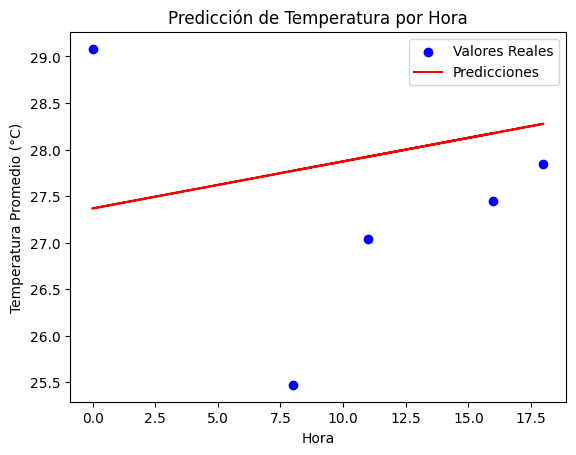

In [20]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Asegurarte de que los datos de temperatura estén en formato numérico y datetime
df['Tiempo'] = pd.to_datetime(df['Tiempo'])
df['Temperatura°C'] = df['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)

# Crear una nueva columna con solo las horas
df['Hora'] = df['Tiempo'].dt.hour

# Agrupar los datos por hora y calcular el promedio de temperatura por hora
df_grouped = df.groupby('Hora')['Temperatura°C'].mean().reset_index()

# Crear las características (X) y la variable objetivo (y)
X = df_grouped[['Hora']]  # Las horas serán las características
y = df_grouped['Temperatura°C']  # La temperatura será la variable objetivo

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Graficar las predicciones frente a los valores reales
plt.scatter(X_test, y_test, color='blue', label='Valores Reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Hora')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Predicción de Temperatura por Hora')
plt.legend()
plt.show()


Mean Squared Error: 0.6039069095110268


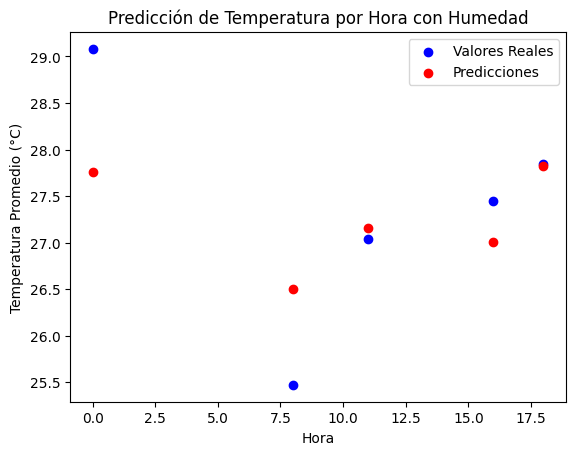

In [19]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Asegurarte de que los datos de temperatura y humedad estén en formato numérico y datetime
df['Tiempo'] = pd.to_datetime(df['Tiempo'])
df['Temperatura°C'] = df['Temperatura°C'].astype(str).str.replace(',', '.').astype(float)
df['Humedad%'] = df['Humedad%'].astype(str).str.replace(',', '.').astype(float)

# Crear una nueva columna con solo las horas
df['Hora'] = df['Tiempo'].dt.hour

# Agrupar los datos por hora y calcular el promedio de temperatura y humedad por hora
df_grouped = df.groupby('Hora').agg({
    'Temperatura°C': 'mean',
    'Humedad%': 'mean'
}).reset_index()

# Crear las características (X) y la variable objetivo (y)
X = df_grouped[['Hora', 'Humedad%']]  # Las horas y la humedad serán las características
y = df_grouped['Temperatura°C']  # La temperatura será la variable objetivo

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Graficar las predicciones frente a los valores reales
plt.scatter(X_test['Hora'], y_test, color='blue', label='Valores Reales')
plt.scatter(X_test['Hora'], y_pred, color='red', label='Predicciones')
plt.xlabel('Hora')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Predicción de Temperatura por Hora con Humedad')
plt.legend()
plt.show()


# Conclusión 
Como podemos observar, el usar una variable adicional que además esta correlacionada a la variable de la que planeamos hallar el modelo predictivo reduce el margen de error a más de la tercera parte, propiciando predicciones más cercanas a los resultados reales. 